In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import nltk
from nltk.util import ngrams
%matplotlib inline

In [38]:
# dataset com autor, palavras e tfidf de cada palavra
shire = pd.read_csv('shire.csv')

In [39]:
shire.head()

,author,word,tfidf
0,gandalf,cachimbo,179.87
1,gandalf,inimigo,130.03
2,gandalf,mago,217.02
3,gandalf,aventura,98.74
4,gandalf,anel,256.05


In [40]:
# criando um dataset para cada autor
gandalf_df = shire[shire['author'] == 'gandalf']
bilbo_df = shire[shire['author'] == 'bilbo']
sauron_df = shire[shire['author'] == 'sauron']
galadriel_df = shire[shire['author'] == 'galadriel']

In [41]:
# juntando tudo numa só tabela, porém com os tfidf
# ordenados do maior para o maior
graph_df = pd.concat([
    gandalf_df.sort_values(by='tfidf', ascending=False),
    bilbo_df.sort_values(by='tfidf', ascending=False),
    sauron_df.sort_values(by='tfidf', ascending=False),
    galadriel_df.sort_values(by='tfidf', ascending=False)
])

In [42]:
# criando um grafo tendo autores como nós principais e as palavras
# como nós secundários
graph = nx.from_pandas_edgelist(graph_df, source='author', target='word')

In [43]:
# informações do grafo
print(nx.info(graph))

Graph with 23 nodes and 28 edges


C:\Users\Felype\AppData\Local\Temp/ipykernel_15560/3581210431.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(graph))


In [44]:
graph_df

,author,word,tfidf
4,gandalf,anel,256.05
2,gandalf,mago,217.02
6,gandalf,hobbits,216.62
0,gandalf,cachimbo,179.87
5,gandalf,tolos,138.31
1,gandalf,inimigo,130.03
3,gandalf,aventura,98.74
12,bilbo,comida,267.01
10,bilbo,aventura,236.89
8,bilbo,hobbits,232.19


In [45]:
# lista com os tfidf (ler última célula)
tfidf_list = graph_df['tfidf']

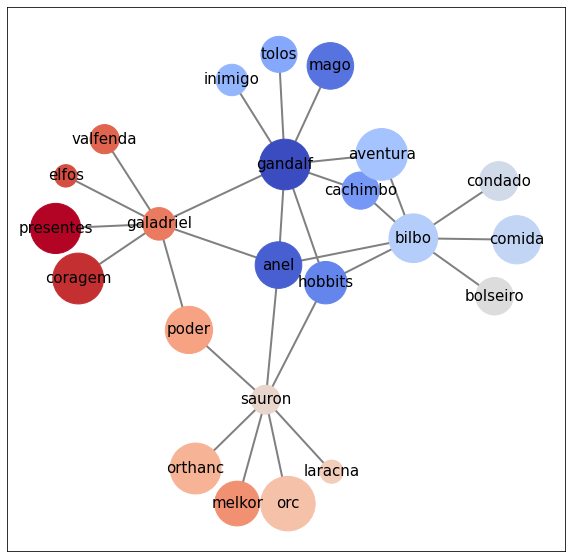

In [52]:
plt.figure(figsize=(10,10))
cmap = plt.cm.coolwarm
colors = [n for n in range(len(graph.nodes()))]
pos = nx.spring_layout(graph, k=.14)
nx.draw_networkx(graph, pos, node_size = tfidf_list[:len(pos)].values*10, cmap=cmap,
node_color = colors, edge_color='grey', font_size=15, width=2, alpha=1)

O problema está acontecendo com o parâmetro node_size na linha 5 da célula acima. Acontece que a lista de tfidf é maior do que o número de nós, porque há termos que se repetem para diferentes autores e portanto há valores de tfidf diferentes. Já no grafo esses termos que se repetem são representados por apenas um nós. O que deve ser feito é uma média entre os tfidf dos termos que se repetem para que fique só um valor na entrada.